This notebook shows how to convert contrast data to masses using known calibration parameters 

The calibration function is defined as contrast = f(mass) = slope * mass + intercept

In [1]:
from pyphotomol import (
    MPAnalyzer,
    plot_histogram,
    plot_histograms_and_fits,
    PlotConfig,
    LayoutConfig,
    LegendConfig
)
from scripts import display_figure_static # Only for static display, to be shown in GitHub

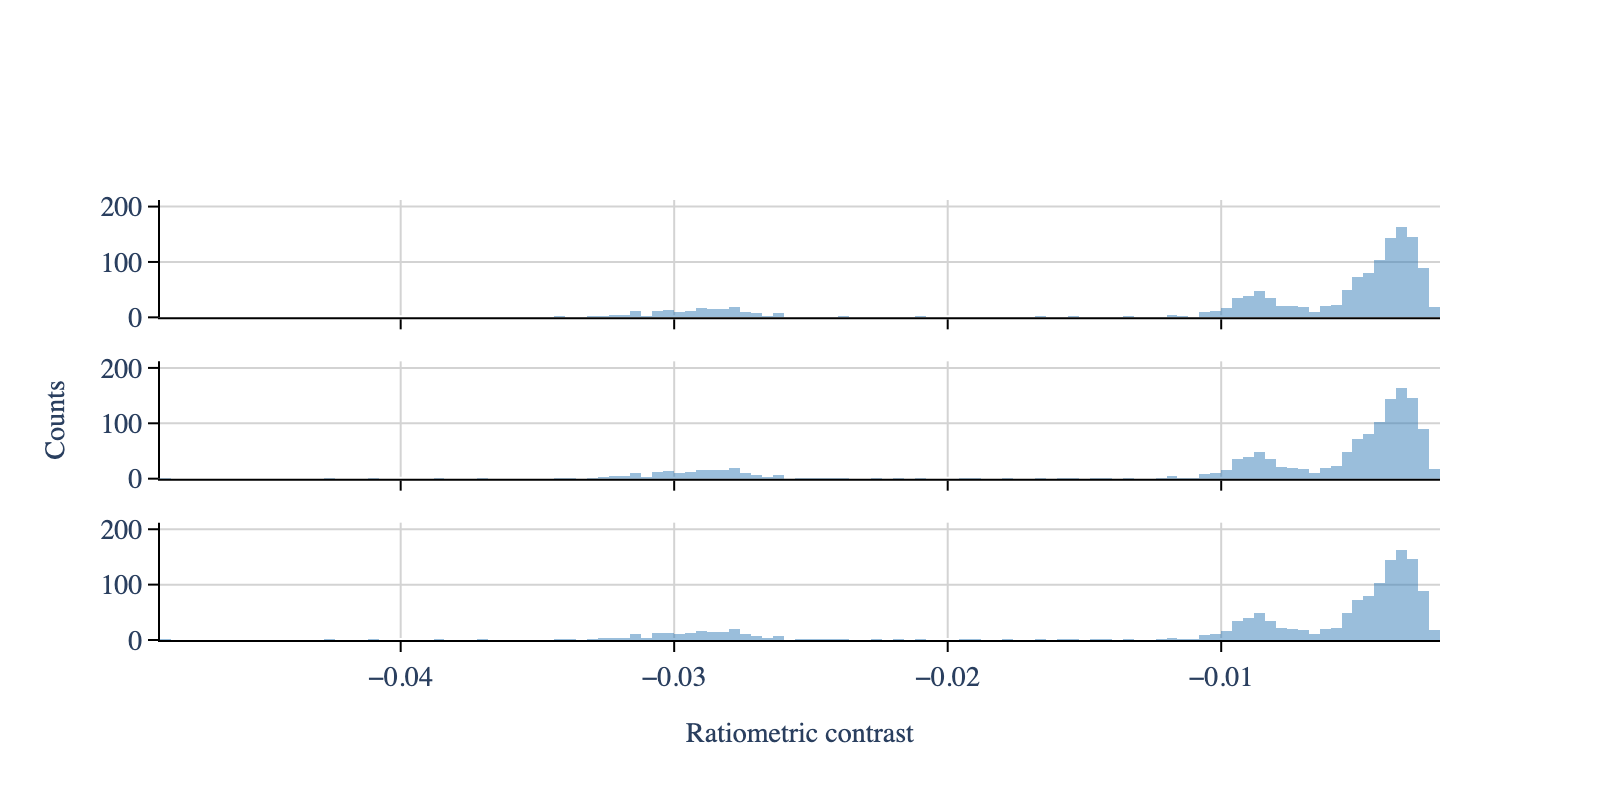

In [2]:
file = '../test_files/demo.h5'
mp = MPAnalyzer()

files = [file] * 3
names = [f'demo{i+1}' for i in range(3)]

mp.import_files(files, names=names)
mp.apply_to_all('count_binding_events')
# Create the histogram - same window and bin width for all files
mp.apply_to_all('create_histogram', use_masses=False, window=[-0.05, 0], bin_width=0.0004)

# Create configuration objects
plot_config = PlotConfig(contrasts=True)
layout_config = LayoutConfig(stacked=True,extra_padding_y_label=0.02)

fig = plot_histogram(mp, 
                     plot_config=plot_config,
                     layout_config=layout_config)
display_figure_static(fig, height=400)

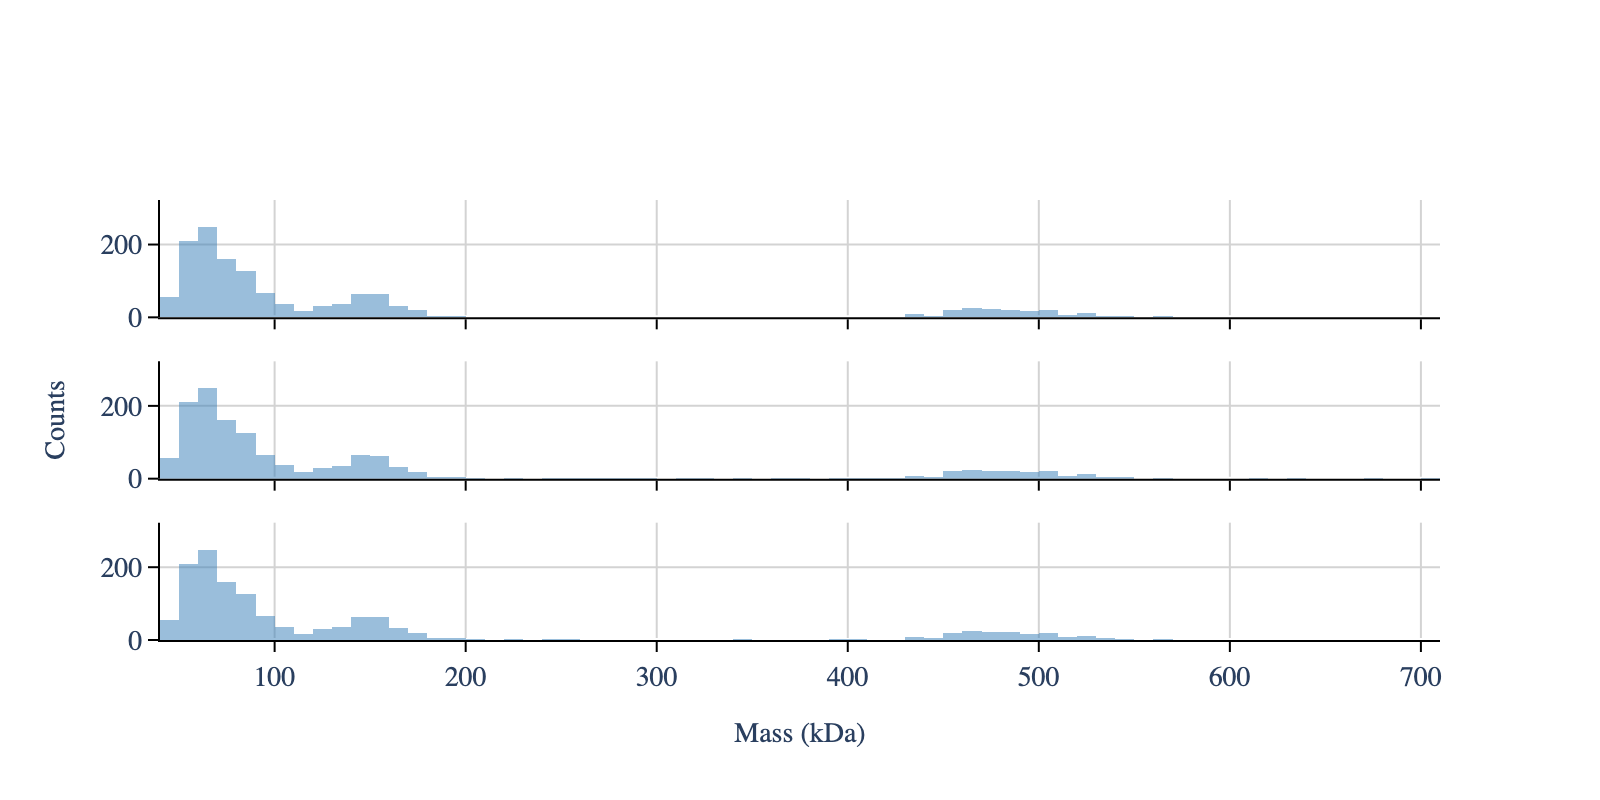

In [3]:
# Apply the calibration
mp.apply_to_all('contrasts_to_masses',
                slope=-6.115911272669366e-05,
                intercept=0.0004374498828378568)  # Taken from notebook 3

# Create the histogram with masses
mp.apply_to_all('create_histogram', use_masses=True, window=[0, 800], bin_width=10)

fig = plot_histograms_and_fits(mp, layout_config=layout_config)
display_figure_static(fig, height=400)

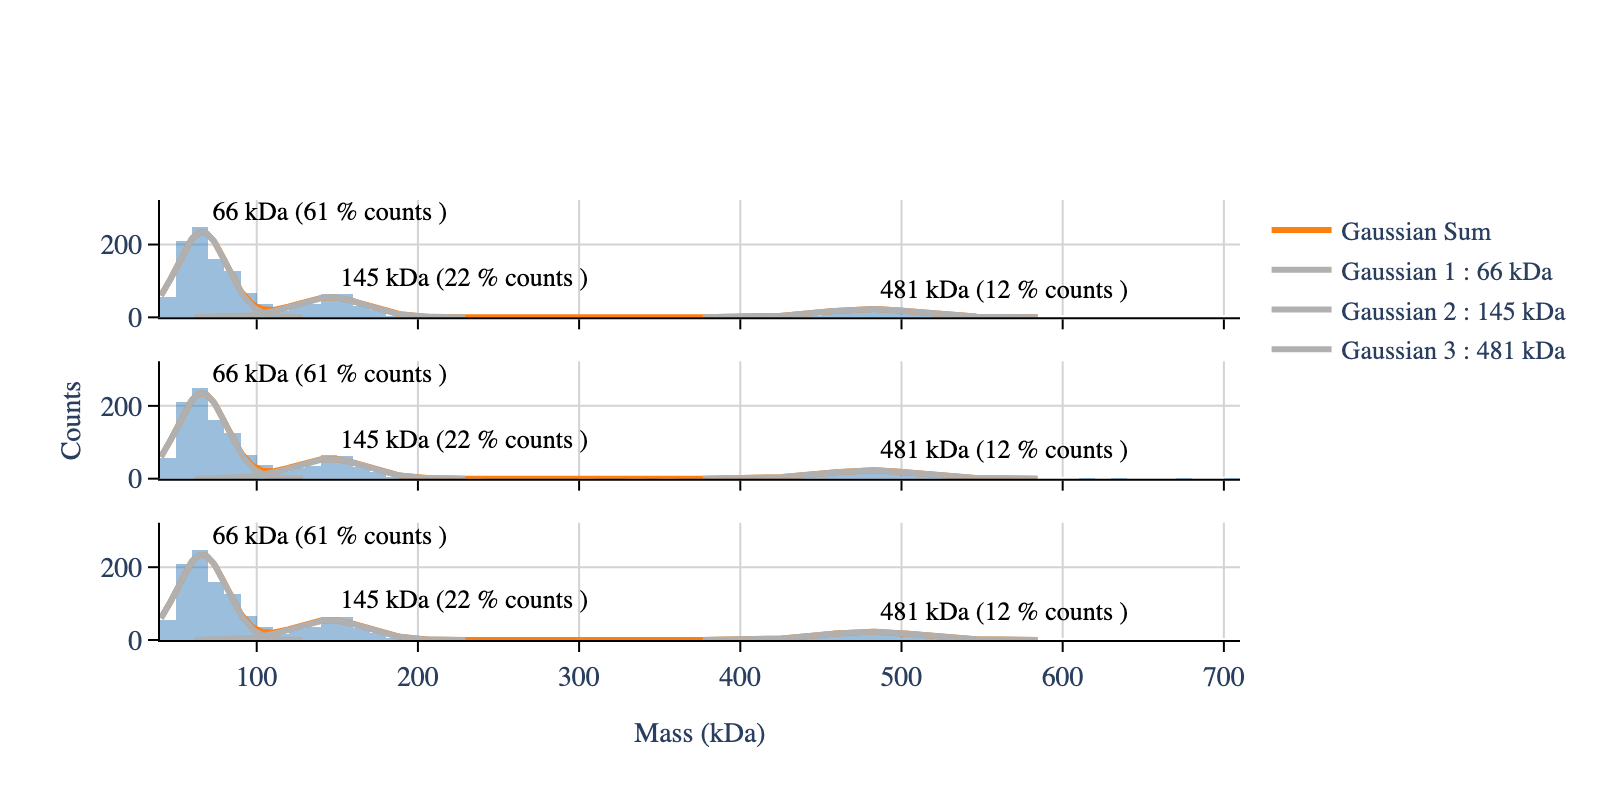

In [4]:
# Fit and plot the fit
# Fit the mass distribution using a multi gaussian 
mp.apply_to_all(method_name='fit_histogram',
                peaks_guess=[65, 145, 465],  # Initial peak guess, same for both files
                mean_tolerance=100,  # Tolerance for the mean of the gaussian
                std_tolerance=100,  # Tolerance for the standard deviation of the gaussian
                threshold=40,  # Minimum observed value for the masses
                baseline=0)  # Baseline value for the fit

show_legend_all = [False] * 12  # Nine gaussians + 3 gaussian sums
for i in range(4):
    show_legend_all[i] = True  # Show the first four legends

# Create configuration objects
layout_config = LayoutConfig(
    stacked=True,
    extra_padding_y_label=0.02
)
legend_config = LegendConfig(show_legend_all=show_legend_all)

fig = plot_histograms_and_fits(mp, 
                               layout_config=layout_config,
                               legend_config=legend_config)
display_figure_static(fig, height=400)